# Exercise 01 2d Ising model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import math as math
from timeit import default_timer as timer
from tqdm import tqdm
import scipy.optimize

In [2]:
def nn_sum(grid, i, j):
    """
    Args:
        x: Spin configuration
        i, j: Indices describing the position of one spin

    Returns:
        Sum of the spins in x which are nearest neighbors of (i, j)
    """
    L = np.size(grid,1)
    result = grid[(i-1)%L,j]+grid[(i+1)%L,j]+grid[i,(j+1)%L]+grid[i,(j-1)%L]

    return int(result)


def total_energy(grid):
    """
    Args:
        x: Spin configuration

    Returns:
        Total energy of configuration x.
    """
    L = np.size(grid,1)
    energy = 0
    for i in range(L):
        for j in range(L):
            # TODO: compute energy of site (i,j)
            energy -= grid[i,j]*nn_sum(grid,i,j)/2
			
    return energy


def move(x, M, E, b):
    """
    Args:
        x: Spin configuration
        M: Magnetization of x
        E: Energy of x
        b: inverse temperature

    Returns:
        Updated x, M and E after one Monte Carlo move
    """
    # Probability look-up tables
	# TODO: optionally use probability lookup tables
	
    # TODO: pick one site at random
    i, j = rd.randrange(L), rd.randrange(L)

    # Flip the spin of that site according to the Metropolis algorithm
    # TODO: compute the local magnetic field at site (i,j) due to nearest-neighbours
    
	# TODO: Compute the Metropolis acceptance probability `R` and compare it to a random number in [0,1)
    ΔE = 2*x[i,j]*nn_sum(x,i,j)
    if (rd.random() < math.exp(- ΔE * b)):
        M -= 2*x[i,j]
        x[i,j] *= -1
        E += ΔE
        # TODO: flip the spin
        # TODO: update the magnetisation and energy

    return x, M, E





In [3]:
"""
args:
    L: linear size of the system
    beta: inverse temperatures
    Nthermalization: number of thermalization steps
    Nsample: number of samples (= size of the Markov chain)
    Nsubweep: number of subsweeps (to generate better samples)
    
Returns:
    arrays for the magnetization, energy, susceptiblity and heat capacity
    depending on the inverse temperature β


"""
def simulate(L,beta,Nthermalization,Nsample,Nsubsweep):
    
    N = L**2

    M_arr = np.zeros_like(beta) # average magnetizations
    E_arr = np.zeros_like(beta) # average energies
    M_err = np.zeros_like(beta) # standard deviations of the magnetizations
    E_err = np.zeros_like(beta) # standard deviations of the energies
    chi_arr = np.zeros_like(beta) # magnetic susceptibilities
    cv_arr = np.zeros_like(beta) # heat capacities

    # calculate the relevant physical quantities for different temperatures
    for t in range(beta.size):
        print('Running for inverse temperature =', beta[t])

        # TODO: Generate a random initial configuration
        # TODO: compute its magnetisation and energy

        # random initial configuration
        x = np.random.randint(2, size=(L, L))*2 - 1 
        M = np.sum(x)
        E = total_energy(x)
        
        #x = np.ones((L, L)) # initialise with uniform configuration
        #M = N # magnetisation for uniform configuration
        #E = -2*J*N # every lattice site contributes an energy -2J

        # TODO: run a thermalisation loop
        for _ in range(Nthermalization):
            x, M, E = move(x, M, E, beta[t])

        # measurement of M and E
        print("Sampling M and E ...")

        M_data = np.zeros(Nsample)
        E_data = np.zeros(Nsample)

        M_data[0] = np.abs(M)/N
        E_data[0] = E/N

        for n in tqdm(range(1, Nsample)):
            for _ in range(Nsubsweep):
                x, M, E = move(x, M, E, beta[t])

            M_data[n] = np.abs(M)/N
            E_data[n] = E/N

        M_arr[t] = np.mean(M_data) # average magnetization
        E_arr[t] = np.mean(E_data) # average energy
        # TODO: use the fluctuation dissipation to compute the 
        # specific heat and susceptibility from the M and E data
        M_err[t] = np.var(M_data) # std. deviation of magnetization
        E_err[t] = np.var(E_data) # std. deviation of energy
        chi_arr[t] = M_err[t]**2*N*beta[t]
        cv_arr[t] = E_err[t]**2*(beta[t]**2)
        
    return M_arr, E_arr, M_err, E_err, chi_arr, cv_arr 


## Task 1

In [4]:
L = 5 # linear size of the system
N = L**2
beta = np.linspace(0.1, 0.8, 10) # inverse temperatures
Nthermalization = int(10e5) # number of thermalization steps
Nsample = 5000 # number of samples (= size of the Markov chain)
Nsubsweep = 10*N # number of subsweeps (to generate better samples)

M_arr, E_arr, M_err, E_err, chi_arr, cv_arr = simulate(L,beta,Nthermalization,Nsample,Nsubsweep)

Running for inverse temperature = 0.1
Sampling M and E ...


100%|█████████████████████████████████████| 4999/4999 [00:04<00:00, 1247.17it/s]


Running for inverse temperature = 0.17777777777777778
Sampling M and E ...


100%|█████████████████████████████████████| 4999/4999 [00:03<00:00, 1256.42it/s]


Running for inverse temperature = 0.25555555555555554
Sampling M and E ...


100%|█████████████████████████████████████| 4999/4999 [00:03<00:00, 1275.92it/s]


Running for inverse temperature = 0.33333333333333337
Sampling M and E ...


100%|█████████████████████████████████████| 4999/4999 [00:03<00:00, 1297.10it/s]


Running for inverse temperature = 0.4111111111111111
Sampling M and E ...


100%|██████████████████████████████████████| 4999/4999 [00:05<00:00, 862.32it/s]


Running for inverse temperature = 0.48888888888888893
Sampling M and E ...


100%|█████████████████████████████████████| 4999/4999 [00:03<00:00, 1382.01it/s]


Running for inverse temperature = 0.5666666666666667
Sampling M and E ...


100%|█████████████████████████████████████| 4999/4999 [00:03<00:00, 1403.85it/s]


Running for inverse temperature = 0.6444444444444445
Sampling M and E ...


100%|█████████████████████████████████████| 4999/4999 [00:03<00:00, 1406.00it/s]


Running for inverse temperature = 0.7222222222222222
Sampling M and E ...


100%|█████████████████████████████████████| 4999/4999 [00:03<00:00, 1402.94it/s]


Running for inverse temperature = 0.8
Sampling M and E ...


100%|█████████████████████████████████████| 4999/4999 [00:03<00:00, 1419.10it/s]


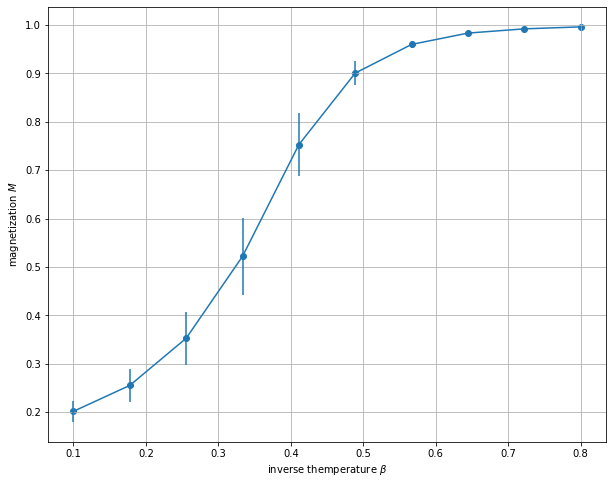

In [5]:
#plot magnetization
plt.figure(figsize=(10,8))
plt.scatter(beta, M_arr)
plt.errorbar(beta, M_arr,yerr = M_err)
plt.xlabel(r"inverse themperature $\beta$")
plt.ylabel(r"magnetization $M$")
plt.grid(True)
#plt.savefig("magnetization.svg", format = 'svg', dpi=300)

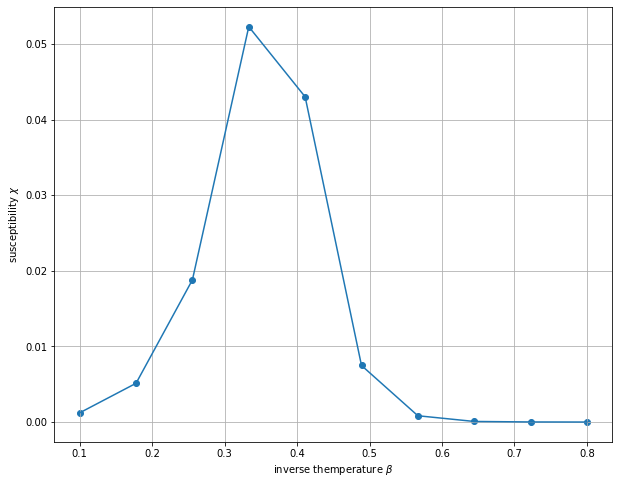

In [6]:
#plot susceptibility
plt.figure(figsize=(10,8))
plt.scatter(beta,chi_arr)
plt.plot(beta,chi_arr)
plt.xlabel(r"inverse themperature $\beta$")
plt.ylabel(r"susceptibility $\chi$")
plt.grid(True)
#plt.savefig("susceptibility.svg", format = 'svg', dpi=300)

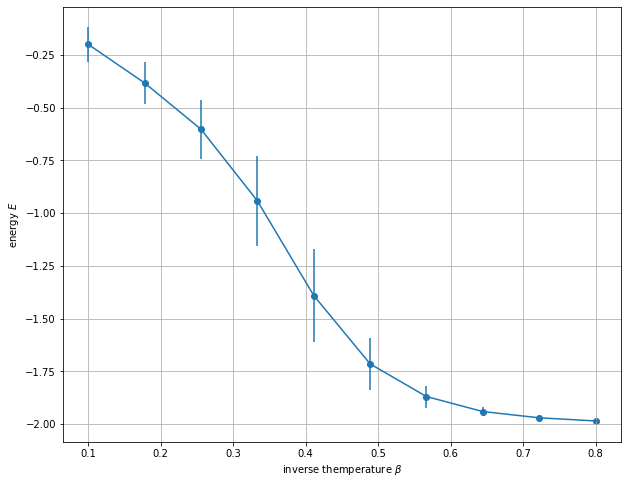

In [7]:
#plot energy
plt.figure(figsize=(10,8))
plt.scatter(beta, E_arr)
plt.errorbar(beta, E_arr, yerr = E_err)
plt.xlabel(r"inverse themperature $\beta$")
plt.ylabel(r"energy $E$")
plt.grid(True)
#plt.savefig("energy.svg", format = 'svg', dpi=300)

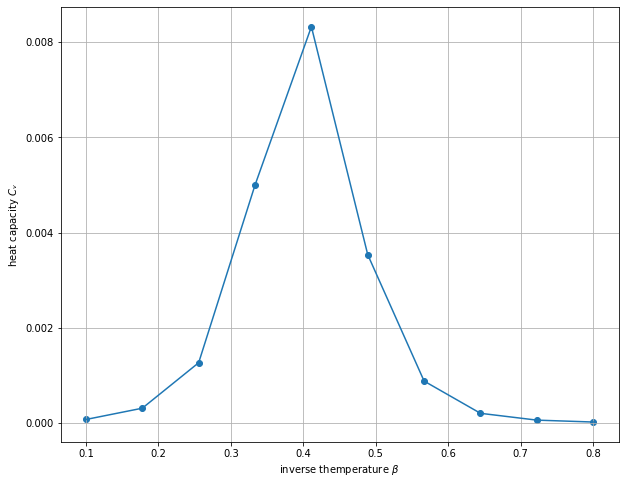

In [8]:
#plot heat capacity
plt.figure(figsize=(10,8))
plt.scatter(beta,cv_arr)
plt.plot(beta,cv_arr)
plt.xlabel(r"inverse themperature $\beta$")
plt.ylabel(r"heat capacity $Cᵥ$")
plt.grid(True)
#plt.savefig("capacity.svg", format = 'svg', dpi=300)

# Task 2

In [112]:
#first we want to fit the magnetization 
xdata = beta
ydata = M_arr

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess


param,pcov = scipy.optimize.curve_fit(sigmoid, xdata, ydata, p0, method='dogbox')

#std_deviation = np.sqrt(np.diag(pcov))

In [120]:
#calculate the intersection with 0.5
x = np.linspace(0.1,0.8,100)
f = 0.5*np.ones_like(x)
g = sigmoid(x,param[0],param[1],param[2],param[3])
idx = np.argwhere(np.diff(np.sign(f - g))).flatten()

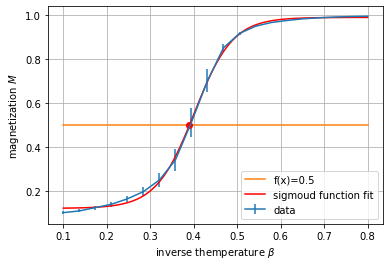

In [132]:
#plot magnetization


plt.figure()
plt.errorbar(beta, M_arr,yerr = M_err,label="data")
plt.plot(x,f,label = "f(x)=0.5")
plt.plot(x,g,color='r',label="sigmoud function fit")
plt.plot(x[idx], f[idx], 'ro')
plt.xlabel(r"inverse themperature $\beta$")
plt.ylabel(r"magnetization $M$")
plt.grid(True)
plt.legend(loc="lower right")
plt.savefig("magnetization_fit.svg", format = 'svg', dpi=300)

In [168]:

ydata2 = χ_arr

def normal(x, a ,b, c):
    y = a*np.exp(-(x-b)**2/c)
    return (y)


param2,pcov2 = scipy.optimize.curve_fit(normal, xdata, ydata2, method='dogbox')

#std_deviation = np.sqrt(np.diag(pcov))

/var/folders/7x/8rk5f_057bxdbtdkhq27866m0000gn/T/ipykernel_14776/2309843302.py:4: RuntimeWarning: divide by zero encountered in true_divide
  y = a*np.exp(-(x-b)**2/c)


In [169]:
param2

array([2.53358498, 0.39689854, 0.00620646])

In [177]:
np.sqrt(np.diag(pcov2))

array([0.11512254, 0.00292282, 0.00065128])

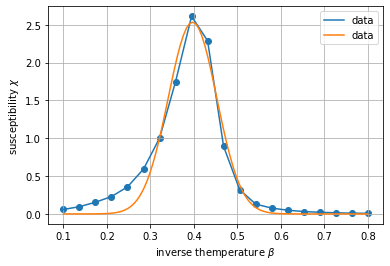

In [179]:
plt.figure()
plt.scatter(beta,chi_arr)
plt.plot(beta,chi_arr,label = 'data')
plt.plot(x,normal(x,param2[0],param2[1],param2[2]),label = 'data')
plt.xlabel(r"inverse themperature $\beta$")
plt.ylabel(r"susceptibility $\chi$")
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig("susceptibility_fit.svg", format = 'svg', dpi=300)

In [172]:
ydata3 = cv_arr

param3,pcov3 = scipy.optimize.curve_fit(normal, xdata, ydata3, method='dogbox')

#std_deviation = np.sqrt(np.diag(pcov))

In [174]:
param3

array([0.01118851, 0.43757441, 0.01526765])

In [178]:
np.sqrt(np.diag(pcov3))

array([0.00069364, 0.0062546 , 0.0021859 ])

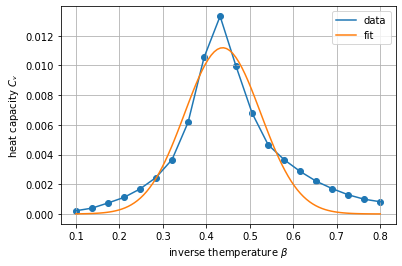

In [180]:
#plot heat capacity
plt.figure()
plt.scatter(beta,cv_arr)
plt.plot(beta,cv_arr,label ='data')
plt.plot(x,normal(x,param3[0],param3[1],param3[2]),label = 'fit')
plt.xlabel(r"inverse themperature $\beta$")
plt.ylabel(r"heat capacity $Cᵥ$")
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig("capacity_fit.svg", format = 'svg', dpi=300)